In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Iris.csv',usecols=['PetalLengthCm','PetalWidthCm','Species'])

In [4]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
mapping = {
    'Iris-setosa':'Setosa',
    'Iris-versicolor':'Versicolor',
    'Iris-virginica':'Virginica'
}

data["Species"] = data["Species"].map(mapping)

### Original Cluster

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

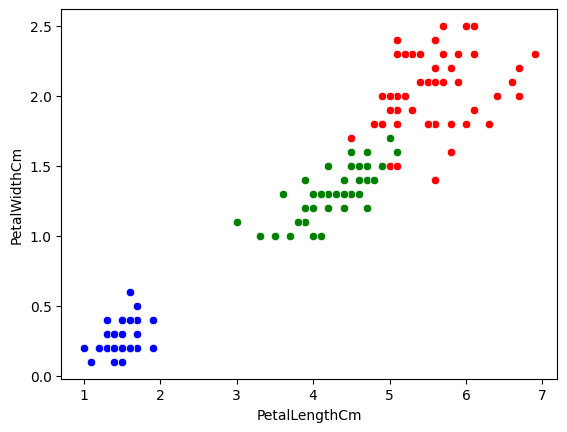

In [6]:

data0 = data[data['Species'] == 'Setosa']
data1 = data[data['Species'] == 'Versicolor']
data2 = data[data['Species'] == 'Virginica']

sns.scatterplot(x=data0['PetalLengthCm'],y=data0['PetalWidthCm'],color='blue')
sns.scatterplot(x=data1['PetalLengthCm'],y=data1['PetalWidthCm'],color='green')
sns.scatterplot(x=data2['PetalLengthCm'],y=data2['PetalWidthCm'],color='red')


### Now we need to classify with the length Features

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()

scaler.fit(data[['PetalLengthCm']])
data['PetalLengthCm'] = scaler.transform(data[['PetalLengthCm']])

scaler.fit(data[['PetalWidthCm']])
data['PetalWidthCm'] = scaler.transform(data[['PetalWidthCm']])

In [8]:
kmeans = KMeans(n_clusters=3)
y_predicted=kmeans.fit_predict(data[['PetalLengthCm','PetalWidthCm']])
data['cluster']=y_predicted
data

,PetalLengthCm,PetalWidthCm,Species,cluster
0,0.067797,0.041667,Setosa,1
1,0.067797,0.041667,Setosa,1
2,0.050847,0.041667,Setosa,1
3,0.084746,0.041667,Setosa,1
4,0.067797,0.041667,Setosa,1
...,...,...,...,...
145,0.711864,0.916667,Virginica,2
146,0.677966,0.750000,Virginica,2
147,0.711864,0.791667,Virginica,2
148,0.745763,0.916667,Virginica,2


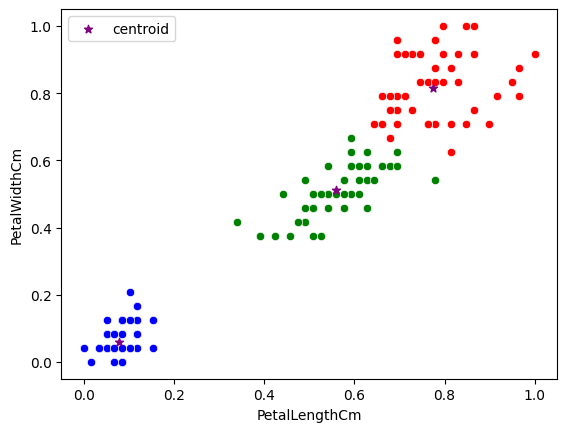

In [10]:
data0 = data[data['cluster'] == 0]
data1 = data[data['cluster'] == 1]
data2 = data[data['cluster'] == 2]


sns.scatterplot(x=data0['PetalLengthCm'],y=data0['PetalWidthCm'],color='green')
sns.scatterplot(x=data1['PetalLengthCm'],y=data1['PetalWidthCm'],color='blue')
sns.scatterplot(x=data2['PetalLengthCm'],y=data2['PetalWidthCm'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()


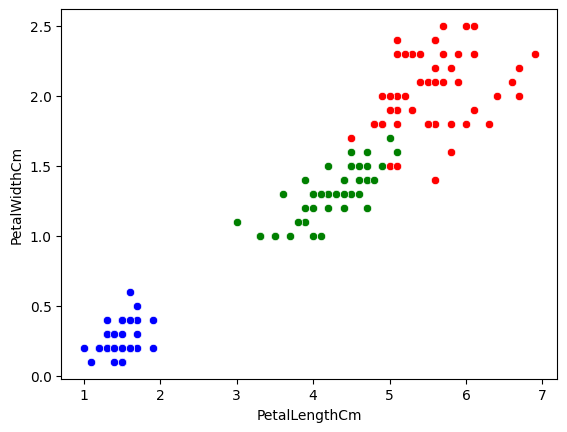 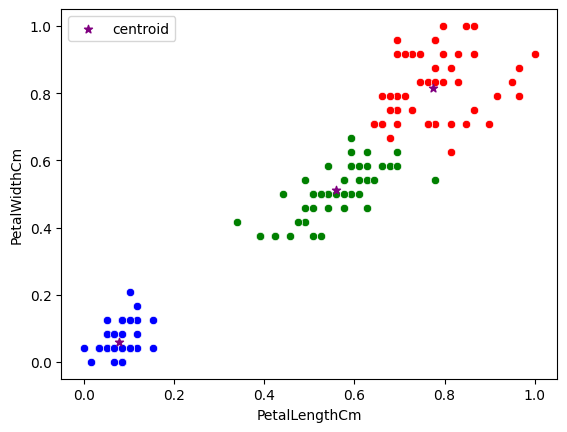

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

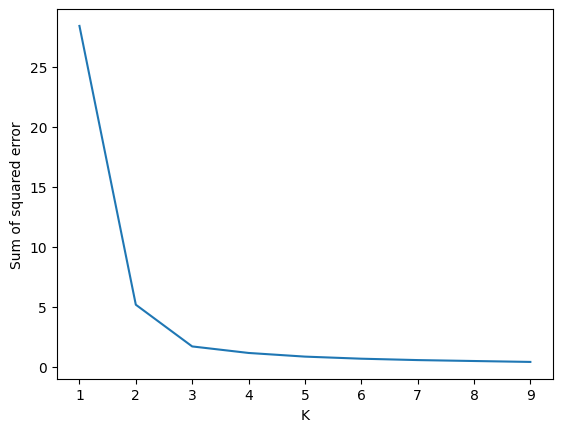

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

##### So optimal k value for the cluster is 3